1. There will be nxm elements in the new matrix obtained. For each element, there will be k multiplications and then the addition of the k products obtained from the k multiplications, i.e., k multiplication and k-1 additions for each of the nxm elements. Hence total multiplications are : (nxm)*k and (nxm)*(k-1). 

2. For multiplication of nxk (say A) and kxm (say B) matrices, the following is the code: 

In [38]:
import time
import numpy as np
A = [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]]
B = [[3, 4, 5],
     [3, 4, 5],
     [3, 4, 5]]

n=3
m=3
k=3

#initialize empty C array
C = []
for i in range(n):
    row = []
    for j in range(m):
        row.append(0)
    C.append(row)

#time_taken array stores all the values of time taken for 1000 iterations for purpose of finding mean and standard deviation
time_taken=np.empty(1000)

for i in range(1000):
  start_time = time.time()
  #iterative multiplication starts here
  for i in range(n):
      for j in range(m):
          for l in range(k):
              C[i][j] += A[i][l] * B[l][j]
  end_time = time.time()
  time_taken[i]=(end_time-start_time)
  
print("Mean time taken", time_taken.mean())
print("Standard Deviation for the time taken", time_taken.std())



Mean time taken 2.349409860075027e-06
Standard Deviation for the time taken 7.374025652717783e-05


Using numpy: 

In [4]:
import numpy as np
import time


A = np.array([[1, 2, 3],
              [1, 2, 3],
              [1, 2, 3]])
B = np.array([[3, 4, 5],
              [3, 4, 5],
              [3, 4, 5]])

#time_taken array stores all the values of time taken for 1000 iterations for purpose of finding mean and standard deviation

time_taken=np.empty(1000)

for i in range(1000):
  start_time = time.time()
  C = np.dot(A, B)
  end_time = time.time()
  time_taken[i]=(end_time-start_time)
print("Mean time taken", time_taken.mean())
print("Standard Deviation for the time taken", time_taken.std())




Mean time taken 6.0956478118896485e-06
Standard Deviation for the time taken 7.575308879584187e-05


Result for matrix of size 3x3 is the following: 


Now, let's take a larger matrix

In [39]:
import time

n=50
m=50
k=50

A=[]
B=[]
C = []
#initialization of arrays
for i in range(n):
    row = []
    row2=[]
    for j in range(m):
        row.append(0)
        row2.append(j)
    C.append(row)
    A.append(row2)
    B.append(row2)

#time_taken array stores all the values of time taken for 1000 iterations for purpose of finding mean and standard deviation
time_taken=np.empty(1000)

for i in range(1000):
  start_time = time.time()
  for i in range(n):
      for j in range(m):
          for l in range(k):
              C[i][j] += A[i][l] * B[l][j]
  end_time = time.time()
  time_taken[i]=(end_time-start_time)

print("Mean time taken", time_taken.mean())
print("Standard Deviation for the time taken", time_taken.std())


Mean time taken 5.031085577294895e-05
Standard Deviation for the time taken 0.0015901730911904932


In [36]:
import numpy as np
import time

#initialization of array
A = np.zeros((50, 50))
B = np.zeros((50, 50))
for i in range(50):
    for j in range(50):
        A[i][j] = j
        B[i][j] = j
#time_taken array stores all the values of time taken for 1000 iterations for purpose of finding mean and standard deviation
time_taken=np.empty(1000)

for i in range(1000):
  start_time = time.time()
  C = np.dot(A, B)
  end_time = time.time()
  time_taken[i]=(end_time-start_time)

print("Mean time taken", time_taken.mean())
print("Standard Deviation for the time taken", time_taken.std())


Mean time taken 1.7846822738647462e-05
Standard Deviation for the time taken 3.5968934980290746e-05


We can clearly see the following result

1.   For smaller matrix iterative process takes lower time
2.   For larger matrix numpy.dot method uses lower time


This is because numpy.dot uses a highly optimized multiplication method which makes it faster. Further these functions are implemented in a faster low level language like C which improves its performance



3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method,  the time complexity of finding the median of the array is O(n^2). 
Reason: If n is even, we need to find both n/2 and n/2+1th highest element. It takes total n/2+1 passes to find them. Each pass takes O(n) time. Hence total time is  O(n*(n/2+1)) which is also O(n^2). 
Similary if n is uneven, we need to find the (n+1)/2 th element which takes (n+1)/2 passes, each of O(n) time. Hence again we obtain time complexity O(n^2). 

A better method is to sort the array using merge/quick sort which takes O(nlogn) time and then find the middle elements of the array in O(1) time. Hence, in total it has complexity O(nlogn). 
Let's take n=101 for example. 

In [16]:

import random
import math
import numpy as np
import time

#intialization of array
n=random.randint(0,20)
arr=np.empty(n)
median=0
for i in range(n):
  arr[i]=(random.randint(0,1000))
A=arr.copy()

med1=0
med2=0

#time_taken array stores all the values of time taken for 1000 iterations for purpose of finding mean and standard deviation
time_taken=np.empty(1000)

for i in range(1000):
  
  start_time = time.time()
  #if number of elements is even
  if(n%2==0):
    for i in range ((n//2)+1):
      index=0
      max=A[0]
      for j in range(n):
        if(A[j]>max):
          max=A[j]
          index=j
          A[index]=-1*math.inf
      if(i==n//2-1):
        med1=max
      if(i==n//2):
        med2=max
    median=((med1+med2)/2) 
  #if number of elements is odd
  else:
    for i in range (((n+1)//2)):
      index=0
      max=A[0]
      for j in range(n):
        if(A[j]>max):
          max=A[j]
          index=j
          A[index]=-1*math.inf
      if(i==(n+1)//2-1):
        med1=max
    median=(med1)
  end_time = time.time()
  time_taken[i]=(end_time-start_time)
print("Median is ", median)
print("Mean time taken", time_taken.mean())
print("Standard Deviation for the time taken", time_taken.std())



Median is  836.0
Mean time taken 2.982110863743799e-08
Standard Deviation for the time taken 9.344179913179309e-07


In [17]:
#Faster sorting method
A=arr.copy()
time_taken=np.empty(1000)

for i in range(1000):
  start_time = time.time()
  A.sort()
  if(n%2==0):
    median=((A[n//2-1]+A[n//2])/2)
  else:
    median=(A[n//2])
  end_time = time.time()
  time_taken[i]=(end_time-start_time)

print("Median is ", median)
print("Mean time taken", time_taken.mean())
print("Standard Deviation for the time taken", time_taken.std())


Median is  778.0
Mean time taken 2.568960189819336e-06
Standard Deviation for the time taken 8.907594994927313e-06


In [15]:
#np.median method
time_taken=np.empty(1000)
median=0
for i in range(1000):
  start_time = time.time()
  median = np.median(arr)
  end_time = time.time()
  time_taken[i]=(end_time-start_time)
print("Median is ", median)
print("Mean time taken", time_taken.mean())
print("Standard Deviation for the time taken", time_taken.std())


Median is  426.0
Mean time taken 3.937840461730957e-05
Standard Deviation for the time taken 5.3828378724341134e-05


4. Differntiation of x^2y+ (y^3)sin(x) with respect to x is: 

        2xy+(y^3)cos(x)

   Differntiation of x^2y+ (y^3)sin(x) with respect to x is: 

        x^2+(3y^2)sin(x)
  Hence the gradient is: 

  [2xy+(y^3)cos(x), x^2+(3y^2)sin(x)]

In [64]:
import jax.numpy as jnp
from jax import grad
from math import sin,cos
def f(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

def f_derv_x(x,y):
  return  2*x*y+(y**3)*cos(x)
def f_derv_y(x,y):
  return  x**2+(3*y**2)*sin(x)

#Let's compare the gradient obtained by jax and our derived formula at (1,2)
a,b=grad(f,argnums=(0,1))(1.0,2.0)

print("(",a,",",b,")")
print("(",f_derv_x(1,2),",",f_derv_y(1,2),")")


( 8.322418 , 11.0976515 )
( 8.322418446945118 , 11.097651817694757 )


We can see that our derived gradient matches with the JAX's derived gradient.

In [49]:
import sympy
x,y = sympy.symbols('x y')

f=(x**2)*y + (y**3)*sympy.sin(x)

f_grad =sympy.diff(f,x), sympy.diff(f,y)

print(f_grad)  


(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


We can see that sympy shows the same formula we derived above

7.
Let the data be: 

2022:
    Branch 1
      Roll Number: 1, Name: N, Marks:
      Maths: 100, English: 70 …
    Branch 2
2023
    Branch 1
    Branch 2
2024
    Branch 1
    Branch 2
2025
    Branch 1
    Branch 2


In [18]:
Marks_rn_1_b1_2022={"Maths":100, "English":70}

S_1_b1_2022={"Roll Number":1,"Name":"N","Marks":Marks_rn_1_b1_2022}

branch_1_2022={"S1":S_1_b1_2022}
branch_1_2023={}
branch_1_2024={}
branch_1_2025={}

branch_2_2022={}
branch_2_2023={}
branch_2_2024={}
branch_2_2025={}

dict_2022={"Branch 1": branch_1_2022,"Branch 2": branch_2_2022}
dict_2023={"Branch 1": branch_1_2023,"Branch 2": branch_2_2023}
dict_2024={"Branch 1": branch_1_2024,"Branch 2": branch_2_2024}
dict_2025={"Branch 1": branch_1_2025,"Branch 2": branch_2_2025}

main_dict={2022:dict_2022,2023:dict_2023,2024:dict_2024,2025:dict_2025}

print(main_dict)

{2022: {'Branch 1': {'S1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


In [19]:
class Year:

  def __init__(self, year):
    self.year = year
  def branch(self, branch):
    self.branch= branch
class Branch:
  def __init__(self,branch):
    self.branch=branch
  def student(self, student):  
    self.student=student
class Student:
  def __init__(self,number):
    self.number=number
  def name(self,name):
    self.name=name
  def rollnumber(self, rollnumber):
    self.rollnumber=rollnumber
  def marks(self,marks):
    self.marks=marks

d1=Year(2022)
d2=Year(2023)
d3=Year(2024)
d4=Year(2025)

dataset=[d1,d2,d3,d4]

b11=Branch("Branch1")
b12=Branch("Branch2")
b21=Branch("Branch1")
b22=Branch("Branch2")
b31=Branch("Branch1")
b32=Branch("Branch2")
b41=Branch("Branch1")
b42=Branch("Branch2")

d1.branch=[b11,b12]
d2.branch=[b21,b22]
d3.branch=[b31,b32]
d4.branch=[b41,b42]

s1=Student(1)
b11.student=[s1]

s1.name="N"
s1.rollnumber=1
s1.marks=[("Maths",100),("English",70)]


In [23]:
import numpy as np
import pandas as pd
import math 
#creating matrix
mat=np.random.uniform(low=1 , high=2, size=(20,5))
#creating dataframe and renaming the columns
df=pd.DataFrame(mat)
df.rename(columns = {0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace = True)

#taking mean and standard deviation
(n,m)=df.shape
std_df=df.std()
mean_df=df.mean(axis=1)


print(df)
# print(std_df)
print("Column with highest standard deviation is :", std_df.idxmax())
# print(mean_df)
print("Row with lowest mean is", mean_df.idxmin())

           A         B         C         D         E
0   1.685452  1.001820  1.201654  1.338409  1.085382
1   1.227888  1.131602  1.124476  1.399264  1.114804
2   1.126808  1.287028  1.837198  1.863688  1.087339
3   1.187789  1.237958  1.696591  1.914299  1.294772
4   1.642745  1.775519  1.886276  1.477210  1.239489
5   1.188469  1.532307  1.781753  1.003130  1.925697
6   1.663249  1.540834  1.245999  1.188417  1.576146
7   1.989496  1.733067  1.230390  1.498167  1.167133
8   1.284412  1.209556  1.915238  1.791699  1.883297
9   1.297148  1.555330  1.488148  1.105752  1.049201
10  1.278797  1.453682  1.609106  1.361486  1.823882
11  1.285667  1.584387  1.648560  1.764491  1.666132
12  1.390281  1.804815  1.271206  1.477839  1.872471
13  1.125848  1.300326  1.072750  1.792248  1.265137
14  1.705599  1.199971  1.019904  1.755109  1.153781
15  1.334258  1.024790  1.080399  1.833834  1.772263
16  1.811672  1.936273  1.512681  1.805864  1.701035
17  1.315928  1.348750  1.970061  1.260769  1.

In [27]:
df['F']=df.iloc[:, 0: 5].sum(axis=1)
#locate rows with sum less than and greater than equal to 8 respectively
df.loc[df["F"] < 8 , "G"] = "LT8"
df.loc[df["F"] >= 8 , "G"] = "GT8"
print("Number of sums less than 8", df.loc[df["G"]=="LT8","G"].size)
print("Number of sums greater than 8", df.loc[df["G"]=="GT8","G"].size)

print("Standard deviation for LT8", df.loc[df["G"]=="LT8","F"].std())
print("Standard deviation for GT8",df.loc[df["G"]=="GT8","F"].std())
print(df)

Number of sums less than 8 17
Number of sums greater than 8 3
Standard deviation for LT8 0.5333709615766323
Standard deviation for GT8 0.41389078761166104
           A         B         C         D         E         F    G
0   1.685452  1.001820  1.201654  1.338409  1.085382  6.312717  LT8
1   1.227888  1.131602  1.124476  1.399264  1.114804  5.998033  LT8
2   1.126808  1.287028  1.837198  1.863688  1.087339  7.202062  LT8
3   1.187789  1.237958  1.696591  1.914299  1.294772  7.331410  LT8
4   1.642745  1.775519  1.886276  1.477210  1.239489  8.021238  GT8
5   1.188469  1.532307  1.781753  1.003130  1.925697  7.431356  LT8
6   1.663249  1.540834  1.245999  1.188417  1.576146  7.214645  LT8
7   1.989496  1.733067  1.230390  1.498167  1.167133  7.618253  LT8
8   1.284412  1.209556  1.915238  1.791699  1.883297  8.084203  GT8
9   1.297148  1.555330  1.488148  1.105752  1.049201  6.495579  LT8
10  1.278797  1.453682  1.609106  1.361486  1.823882  7.526954  LT8
11  1.285667  1.584387  1.648

9.

Using matplot library to plot the functions: 


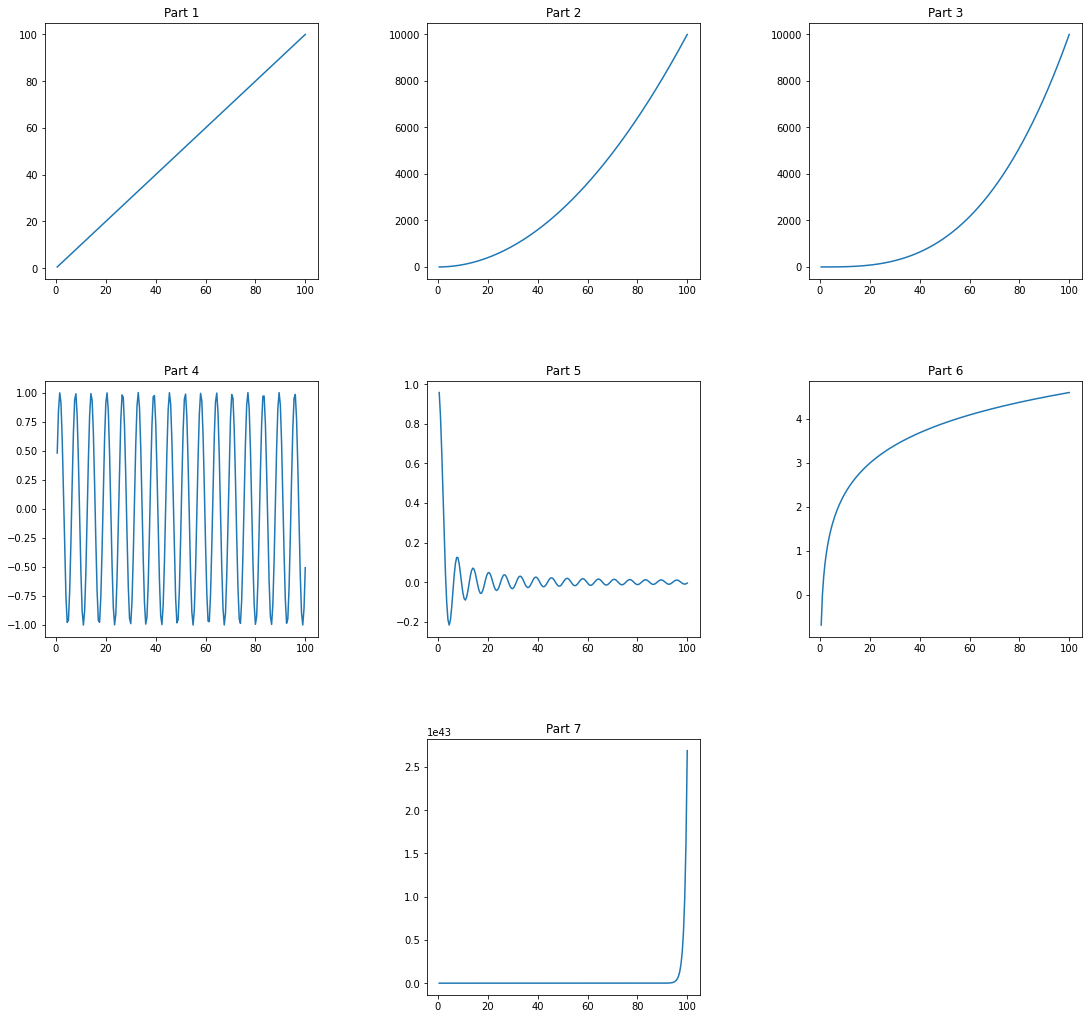

In [29]:
import numpy as np
import matplotlib.pyplot as plt

arr1=np.arange(0.5,100.5, 0.5)

#y=x
def f1(arr):

  return arr
#y=x^2
def f2(arr):

  return np.square(arr)

#y=x^3/100
def f3(arr):

  arr_temp= np.power(arr,3)
  
  return arr_temp/100.

#y=sin(x)
def f4(arr):

  return np.sin(arr)

#y=sin(x)/x
def f5(arr):

  arr_temp= np.sin(arr)
  return np.divide(arr_temp,arr)

#y=log(x)
def f6(arr):
  return np.log(arr)

#y=e^x
def f7(arr):
  return np.exp(arr)


arr=np.arange(0.5,100.5,0.5)
# print(arr)
figure,axis= plt.subplots(3,3,figsize=(16,9))

figure.delaxes(axis[2,0])
figure.delaxes(axis[2,2])
axis[0,0].plot(arr,f1(arr))
axis[0,0].set_title("Part 1")

axis[0,1].plot(arr,f2(arr))
axis[0,1].set_title("Part 2")

axis[0,2].plot(arr,f3(arr))
axis[0,2].set_title("Part 3")

axis[1,0].plot(arr,f4(arr))
axis[1,0].set_title("Part 4")

axis[1,1].plot(arr,f5(arr))
axis[1,1].set_title("Part 5")

axis[1,2].plot(arr,f6(arr))
axis[1,2].set_title("Part 6")

axis[2,1].plot(arr,f7(arr))
axis[2,1].set_title("Part 7")

plt.subplots_adjust(left=0,
                    bottom=0,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)
plt.show()



12.The way Numpy handles arrays with various shapes while performing arithmetic operations is known as broadcasting. The smaller array is "broadcast" across the larger array, subject to certain restrictions, ensuring that their forms match.


In [30]:
import numpy as np
arr1 = np.array([1, 2, 3])
arr2 = 5
print(arr1*arr2)

[ 5 10 15]


We can imagine the 5 being expanded into an array with the same shape as arr1 during the arithmetic operation. The new items are just copies of the initial scalar, as seen in Figure 1. Numpy analyses two arrays' shapes  when performing an operation. It moves leftward starting with the trailing (or farthest right) dimension. 
Two dimensions are compatible when : 
    1. One of them is 1, or,
    2. They both are equal 
Otherwise they are not compatible and an error is thrown. 

Let's see both the compatible and non compatible dimension examples: 


In [31]:
import numpy as np

#compatible
arr1 = np.array([[ 1, 2, 3],[1, 2, 3],[1, 2, 3],[1, 2, 3]])
arr2 = np.array([1, 2, 3])

print(arr1*arr2)

[[1 4 9]
 [1 4 9]
 [1 4 9]
 [1 4 9]]


In [ ]:
import numpy as np

#not compatible

arr1 = np.array([[ 1, 2, 3],[1, 2, 3],[1, 2, 3],[1, 2, 3]])
arr2=np.array([1,2])
print(arr1*arr2)

13.

In [ ]:
import numpy as np
import random
arr=np.random.rand(random.randint(0,100))
n=arr.size

min=arr[0]
index =0 
for i in range(1,n):
  if(arr[i]<min):
    min=arr[i]
    index=i
print(index)
print(np.argmin(arr))

if(index==np.argmin(arr)):
  print("Solution is correct")
else:
  print("Error")

46
46
Solution is correct
